##  Шкалирование признака

In [1]:
import numpy as np
from sklearn import preprocessing

# Создать признак
feature = np.array([[-500.5],
                   [-100.1],
                   [0],
                   [100.1],
                   [900.9]])
feature

array([[-500.5],
       [-100.1],
       [   0. ],
       [ 100.1],
       [ 900.9]])

In [4]:
# Создать шкалировщик
minmax_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# Прошкалировать признак
scaled_feature = minmax_scaler.fit_transform(feature)

scaled_feature

array([[0.        ],
       [0.28571429],
       [0.35714286],
       [0.42857143],
       [1.        ]])

In [7]:
minmax_scaler.fit(feature)


MinMaxScaler()

## Стандартизация признака

In [12]:
# Преобразовать признак чтобы он имел среднее значени 0 и стандартное отклонение 1
import numpy as np
from sklearn import preprocessing

x = np.array([[-1000.1],
            [-200.2],
            [500.5],
            [600.6],
            [9000.9]])

scaler = preprocessing.StandardScaler()

standartized = scaler.fit_transform(x)

standartized

array([[-0.76058269],
       [-0.54177196],
       [-0.35009716],
       [-0.32271504],
       [ 1.97516685]])

In [13]:
round(standartized.mean())

0

In [14]:
standartized.std()

1.0

Если данные имеют значительные выбросы лучше для шкалирования признака использовать медиану и квартильный размах

In [16]:
# Метод робастого шкалирования

robust_scaler = preprocessing.RobustScaler()

robust_scaler.fit_transform(x)

array([[-1.87387612],
       [-0.875     ],
       [ 0.        ],
       [ 0.125     ],
       [10.61488511]])

## Нормализация наблюдений

Требуется прошкалировать значения признаков в наблюдениях для получения единичной нормы

In [21]:
# Используется класс Normalizer

import numpy as np
from sklearn.preprocessing import Normalizer

features = np.array([[0.5,0.5],
                    [1.1,3.4],
                    [1.5,20.2],
                    [1.63, 34.4],
                    [10.9,3.3]])

# Создаем нормализатор

normalizer = Normalizer(norm = "l2")
normalizer.transform(features)

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

In [27]:
features_12_norm = Normalizer(norm = "l2").transform(features)

features_12_norm

array([[0.70710678, 0.70710678],
       [0.30782029, 0.95144452],
       [0.07405353, 0.99725427],
       [0.04733062, 0.99887928],
       [0.95709822, 0.28976368]])

In [30]:
features_11_norm = Normalizer(norm = "l1").transform(features)

features_11_norm

array([[0.5       , 0.5       ],
       [0.24444444, 0.75555556],
       [0.06912442, 0.93087558],
       [0.04524008, 0.95475992],
       [0.76760563, 0.23239437]])

## Генерирование полиноминальных и взаимодействующих признаков

Требуется создать полиноминальные и взаимодействующие признаки

In [31]:
import numpy as np

from sklearn.preprocessing import PolynomialFeatures


features = np.array([[2,3],
                    [2,3],
                    [2,3]])

polynomial_interaction = PolynomialFeatures(degree = 2, include_bias = False)

polynomial_interaction.fit_transform(features)

array([[2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.],
       [2., 3., 4., 6., 9.]])

In [32]:
interaction = PolynomialFeatures(degree = 2, include_bias =False, interaction_only= True)

interaction.fit_transform(features)

array([[2., 3., 6.],
       [2., 3., 6.],
       [2., 3., 6.]])

## Преобразование признаков

Требуется выполнить собственное преобразование одного или более признаков

In [33]:
import numpy as np
from sklearn.preprocessing import FunctionTransformer

features = np.array([[2,3],
                    [3,4],
                    [4,4]])
features

array([[2, 3],
       [3, 4],
       [4, 4]])

In [34]:
def add_ten(x):
    return x+10
ten_transformer = FunctionTransformer(add_ten)

ten_transformer.transform(features)

array([[12, 13],
       [13, 14],
       [14, 14]])

In [35]:
import pandas as pd

df = pd.DataFrame(features, columns =['feature1', 'feature'])

df

,feature1,feature
0,2,3
1,3,4
2,4,4


In [36]:
df.apply(add_ten)

,feature1,feature
0,12,13
1,13,14
2,14,14


## Обнаружение выбросов

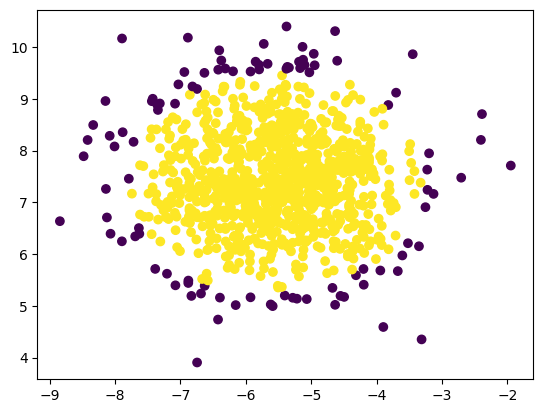

In [22]:
# Допустим что данные нормально распределены
# Можем ограничить данные эллипсом, классифицируя все данные вне эллипса как выбросы

import numpy as np
from sklearn.covariance import EllipticEnvelope
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

features, _ = make_blobs(n_samples = 1000,
                        n_features=2,
                        centers=1,
                        random_state = 5)


outlier_detector = EllipticEnvelope(contamination=.1)

outlier_detector.fit(features)

outlier_detector.predict(features)
plt.scatter(features[:,0],features[:,1],c=outlier_detector.predict(features))

contamination - параметр обозначающий долю выбросов

In [20]:
# Использование межквартильного размаха для оценки выбросов (МКР)
feature = features[:,0]

# Создать функцию, которая возвращает индекс выбросов
def indicies_of_outliers(x):
    q1,q3= np.percentile(x,[25,75])
    iqr=q3-q1
    lower_bound = q1 - (iqr * 1.5)
    upper_bound = q3 + (iqr * 1.5)
    return np.where((x > upper_bound) | (x<lower_bound))

indicies_of_outliers(feature)

(array([ 15, 126, 406, 498, 525, 735, 822, 968]),)

## Обработка выбросов

In [23]:
# Отбросить выбросы
import pandas as pd

houses = pd.DataFrame()
houses['Price'] = [534433,392333, 293222, 4322032]
houses['Bathroom'] = [2,3.5,2, 116]
houses['Square'] = [1500, 2500,1500,48000]

houses[houses['Bathroom'] < 20]

,Price,Bathroom,Square
0,534433,2.0,1500
1,392333,3.5,2500
2,293222,2.0,1500


In [24]:
# Пометить как выбросы
import numpy as np

#Создать признак на основе булевого условия
houses['Outlier'] = np.where(houses['Bathroom'] < 20 , 0, 1)

houses

,Price,Bathroom,Square,Outlier
0,534433,2.0,1500,0
1,392333,3.5,2500,0
2,293222,2.0,1500,0
3,4322032,116.0,48000,1


In [25]:
# Преобразовать признак чтобы ослабить эффект выброса
houses['Log_Square'] = [np.log(x) for x in houses['Square']]

houses

,Price,Bathroom,Square,Outlier,Log_Square
0,534433,2.0,1500,0,7.313220
1,392333,3.5,2500,0,7.824046
2,293222,2.0,1500,0,7.313220
3,4322032,116.0,48000,1,10.778956


## Дискретизация выбросов

Дан числовой признак и требуется разбить его на дискретные корзины

In [29]:
import numpy as np
from sklearn.preprocessing import Binarizer

age = np.array([[6],
               [12],
               [20],
               [36],
               [65]])

binarizer = Binarizer(threshold=18)

binarizer.fit_transform(age)

array([[0],
       [0],
       [1],
       [1],
       [1]])

In [30]:
# Разбить признаки в соответствии с несколькими порогами
np.digitize(age, bins=[20,30,64])

array([[0],
       [0],
       [1],
       [2],
       [3]])

In [31]:
np.digitize(age, bins=[20,30,64],right=True)

array([[0],
       [0],
       [0],
       [2],
       [3]])

In [34]:
np.digitize(age, bins = [18])

array([[0],
       [0],
       [1],
       [1],
       [1]])

## Группировка наблюдений с помощью кластеризации

Сгруппировать похожие наблюдения по группам

In [39]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

features, _ = make_blobs(n_samples = 50,
                       n_features = 2,
                       centers = 3,
                       random_state = 1)

dataframe = pd.DataFrame(features, columns = ['feature1', 'feature2'])

clusterer = KMeans(3, random_state=0)

clusterer.fit(features)

dataframe['Group'] = clusterer.predict(features)

dataframe.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,feature1,feature2,Group
0,-9.877554,-3.336145,0
1,-7.287210,-8.353986,2
2,-6.943061,-7.023744,2
3,-7.440167,-8.791959,2
4,-6.641388,-8.075888,2


## Удаление наблюдений с пропущенными значениями

In [42]:
import numpy as np

features = np.array([[1.1,11.1],
                    [2.2,22.2],
                    [3.3,33.3],
                    [4.4,44.4],
                    [np.nan,55]])

features[~np.isnan(features).any(axis=1)]

array([[ 1.1, 11.1],
       [ 2.2, 22.2],
       [ 3.3, 33.3],
       [ 4.4, 44.4]])

In [43]:
dataframe = pd.DataFrame(features, columns = ['feature1','feature2'])
dataframe

,feature1,feature2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4
4,NaN,55.0


In [45]:
dataframe.dropna()

,feature1,feature2
0,1.1,11.1
1,2.2,22.2
2,3.3,33.3
3,4.4,44.4


## Импутация пропущенных значений

В наших данных имеются пропущенные значения, и требуется заполнить или предсказать из значения

In [52]:
import numpy as np
from fancyimpute import KNN
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs

In [56]:
features, _ = make_blobs(n_samples=1000,
                       n_features=2,
                       random_state=1)

# Первый вариант с KNN
scaler = StandardScaler()
standartize_features = scaler.fit_transform(features)


true_value = standartize_features[0,0]
standartize_features[0,0] = np.nan

features_knn_imputed = KNN(k=5, verbose=0).fit_transform(standartize_features)

print(true_value)
print(features_knn_imputed[0,0])

0.8730186113995938
1.0955332713113226


In [65]:
# Второй вариант с scikit-learn

from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

features_mean_imputed = mean_imputer.fit_transform(features)

print(true_value)
print(features_knn_imputed[0,0])

0.8730186113995938
1.0955332713113226
